In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
import seaborn as sb
import numpy as np
from plotter import *
import pandas as pd
import glob
import os

In [2]:
files = glob.glob('data/results/installed_capacity_2050_*.csv')
files.sort()
files

['data/results/installed_capacity_2050_LC.csv',
 'data/results/installed_capacity_2050_XN.csv',
 'data/results/installed_capacity_2050_ZAN.csv',
 'data/results/installed_capacity_2050_ZN.csv']

In [3]:
labels = {'LC':'Least Cost', 'XN':'Expensive Nuclear', 'ZAN':'Zero Advanced Nuclear', 'ZN':'Nuclear Phaseout'}

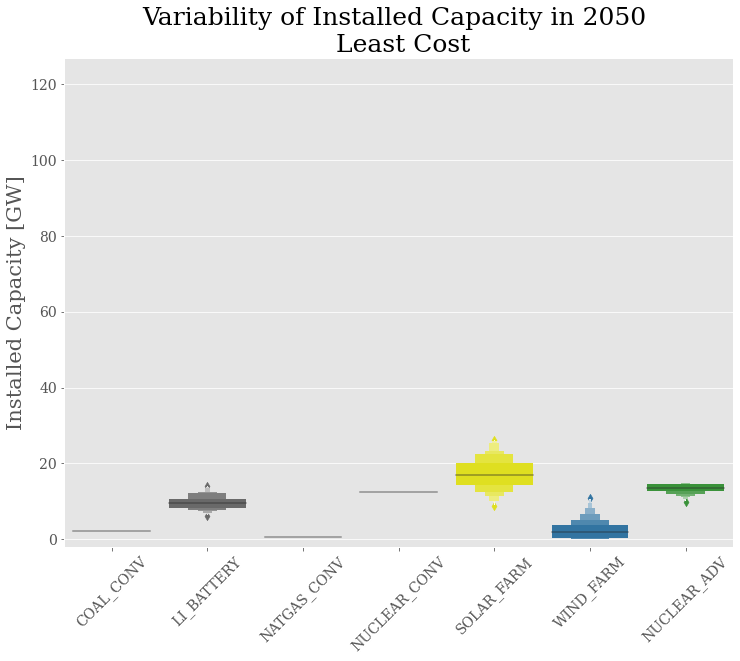

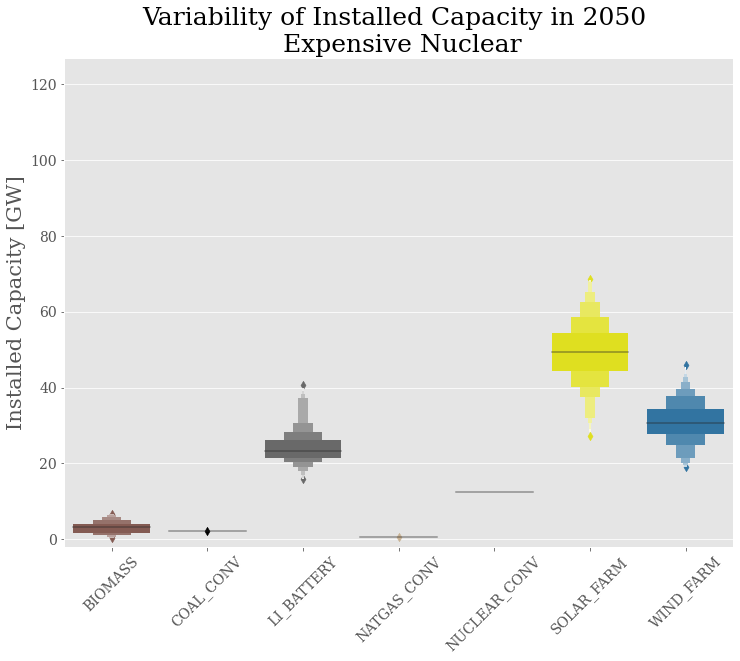

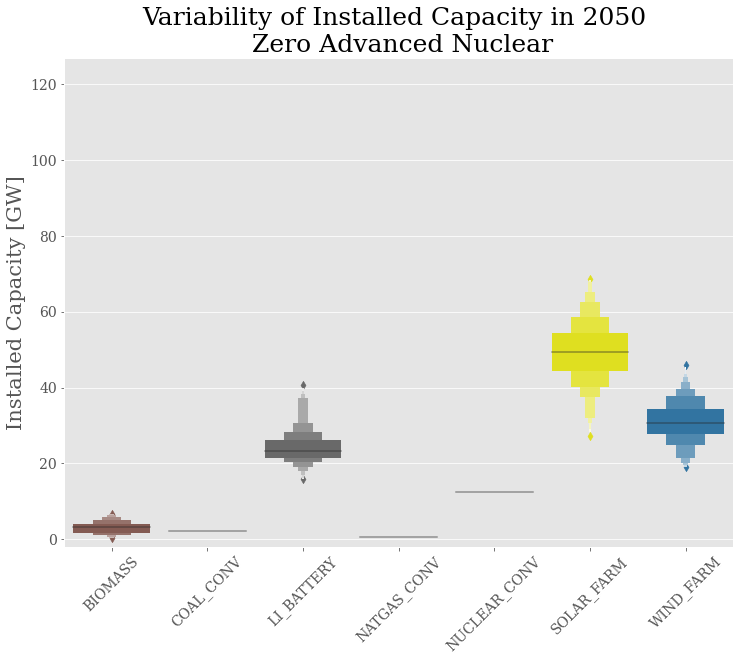

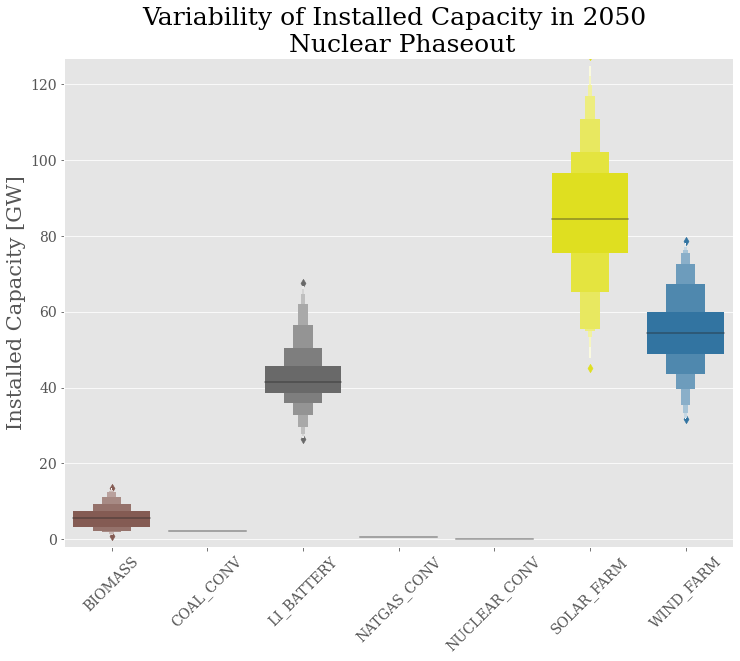

In [13]:
for i, fname in enumerate(files):
    scenario = fname.strip('.csv').split('_')[-1]
    df = pd.read_csv(fname)
    
    sb.boxenplot(data=(df), palette=elc_colors)

    plt.title(f'Variability of Installed Capacity in 2050 \n {labels[scenario]}', fontsize=25)
    plt.ylabel('Installed Capacity [GW]', fontsize=21)
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)
    plt.ylim(-2,127)
    plt.show()

In [14]:
df1 = pd.read_csv(files[0])
df2 = pd.read_csv(files[1])
df3 = pd.read_csv(files[2])
df4 = pd.read_csv(files[3])

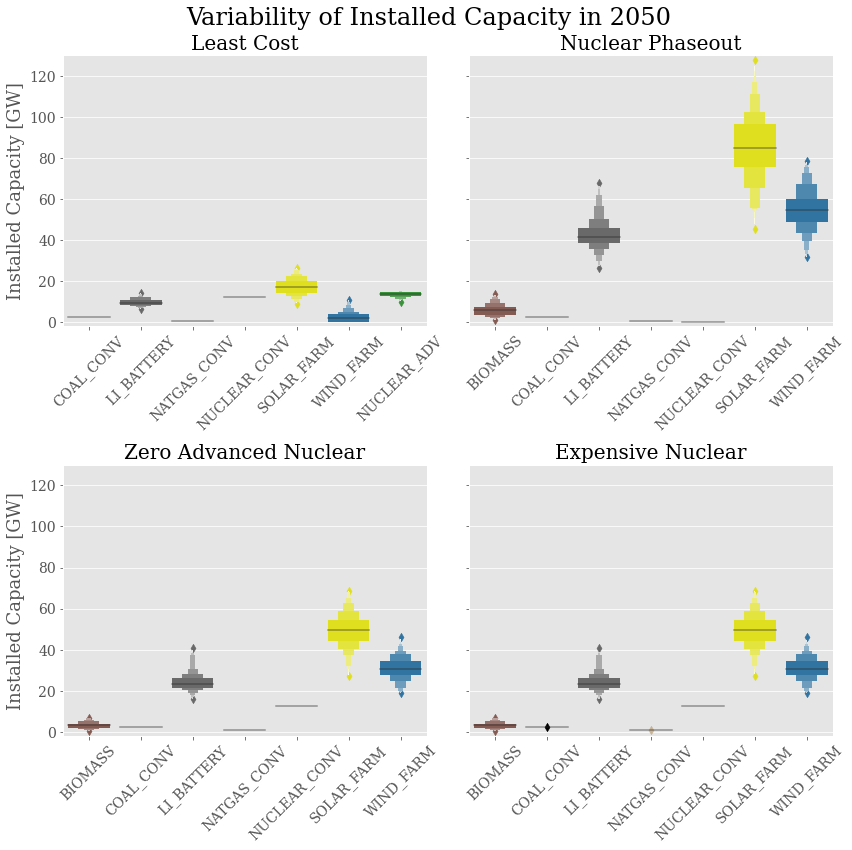

In [33]:
fig, axes = plt.subplots(2,2,figsize=(12,12), sharey=True)
plt.xticks()

sb.boxenplot(ax=axes[0,0],data=df1, palette=elc_colors)
sb.boxenplot(ax=axes[1,1],data=df2, palette=elc_colors)
sb.boxenplot(ax=axes[1,0],data=df3, palette=elc_colors)
sb.boxenplot(ax=axes[0,1],data=df4, palette=elc_colors)


axes[0,0].set_title('Least Cost', fontsize=20)
axes[0,1].set_title('Nuclear Phaseout', fontsize=20)
axes[1,0].set_title('Zero Advanced Nuclear', fontsize=20)
axes[1,1].set_title('Expensive Nuclear', fontsize=20)

axes[0,0].tick_params(axis="x", labelsize=14, rotation=45) 
axes[1,1].tick_params(axis="x", labelsize=14, rotation=45) 
axes[1,0].tick_params(axis="x", labelsize=14, rotation=45) 
axes[0,1].tick_params(axis="x", labelsize=14, rotation=45)

axes[0,0].set_ylabel('Installed Capacity [GW]', fontsize=18)
axes[1,0].set_ylabel('Installed Capacity [GW]', fontsize=18)

axes[0,0].tick_params(axis="y", labelsize=14) 
axes[1,1].tick_params(axis="y", labelsize=14) 
axes[1,0].tick_params(axis="y", labelsize=14) 
axes[0,1].tick_params(axis="y", labelsize=14) 

plt.suptitle('Variability of Installed Capacity in 2050', fontsize=24)
plt.ylim(-2,130)
plt.tight_layout()
plt.show()

In [34]:
demand = 196350  # GWh
nuc_cap = 12420  # MW
nuc_cf = 0.93
solar_cap = 9500 # MW
solar_cf = 0.2
wind_cap = 12600 # MW
wind_cf = 0.35

gen = (nuc_cap*nuc_cf+solar_cap*solar_cf+wind_cap*wind_cf)*8.76
gen

156458.85599999997